In [1]:
import numpy as np
import pandas as pd
import argparse
from datetime import datetime
import random
import os
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import patches as mpatches
plt.style.use('seaborn')
import seaborn as sns
import time
import sys
import os
import scipy.stats as st
# from statsmodels.stats.weightstats import DescrStatsW
# import modules within repository
# from copy import deepcopy
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import warnings
warnings.filterwarnings('ignore');

# display multiple outputs within a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all";

In [10]:
%load_ext autoreload
%autoreload 2
# from params import MEGLpParams
from scipy import stats
from utils.stat_utils import metric_analysis,slice_metric_df

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
imported utils


In [7]:
# %reload_ext autoreload
# parser = argparse.ArgumentParser(description='RiemannianGNN')
# args, _ = parser.parse_known_args()
# MEGLpParams.add_params(parser)
# args = parser.parse_args(args=[])

In [4]:
embedding_dir=os.path.join(os.getcwd(),'outputs',"stats","main_54")
full_stat_df=pd.read_csv(os.path.join(embedding_dir,"embedding_stats_avg5.csv"))
output_dir=os.path.join(embedding_dir,"stat_analysis")

In [5]:
all_scan_ids=set([int(s) for s in model.args.idxs_dict['all']])
clinical_df_subset=clinical_df[clinical_df['Scan Index'].isin(all_scan_ids)]

NameError: name 'model' is not defined

In [26]:
# def digest_stat_df(stat_df,stat_type,prob=False):
#     print(c for c in stat_df.columns)
    
#     cols_to_use=[c for c in stat_df.columns if stat_type.lower() in c.lower()]
#     if prob:
#         cols_to_use=[c for c in cols_to_use if 'prob' in c.lower()]
#     else:
#         cols_to_use=[c for c in cols_to_use if 'prob' not in c.lower()]
#     return np.array(stat_df[cols_to_use]),cols_to_use

# def slice_metric_df(stat_df_full,label_col,conditionals,title='',plot_save_path='',df_save_path=''):
#     conditional_df=stat_df_full[conditionals]
#     if len(conditional_df['ID'].unique())*2<=len(conditional_df['ID']):
#         repeated=True
#     else:
#         repeated=False
#     print(conditional_df.shape,'CONDITIONAL DF')
#     scan_labels = conditional_df[label_col].values
#     print(scan_labels,"SCAN LABELS")
#     print(conditional_df['ID'],'ID LABELS')
    
#     if min(scan_labels)>0:
#         scan_labels=scan_labels-1  
        
#     if label_col in ('diagnosis','diagnosis_inv'):
#         group_labels = ['Healthy Control', 'SCD']
#     elif label_col == 'CogTr':
#         # group_labels=['Control','CogTr']
#         group_labels=['CogTr','Control']
#     elif label_col == 'Pre':
#         group_labels=['Post','Pre']
#     else:
#         raise Exception('Unknown metric col: {}'.format(metric_col))
        
#     cluster_labels=["pDMN","aDMN","DAN","FPN","VN","VAN","SN","SMN"]
        
#     rc,rc_labels=digest_stat_df(conditional_df,stat_type='rad')
#     wc,wc_labels=digest_stat_df(conditional_df,stat_type='coh')
#     bc,bc_labels=digest_stat_df(conditional_df,stat_type='btw')
    
#     age=np.array(conditional_df[['age']])
#     wc=wc.astype(float)

#     val_col=np.array(stat_df_full[label_col])
#     val_col=val_col-val_col.min()
# #     print(val_col,'val col')
# #     print(scan_labels,'graph met')
# #     assert np.sum(np.abs((val_col-scan_labels)))==0
# #     print('ALL EQUAL!')

#     print(wc_labels,'WC LABELS')

# #     metric_analysis(wc,cluster_labels,scan_labels,column_name=label_col,y_axis=['Cluster Cohesion'],plot_title=title,
# #                     plot_save_path=plot_save_path+'_C',
# #                     graph_label_names=group_labels,sort_vals=True,max_plot=8,clinical_df=conditional_df)
#     print('rad')
    
#     print(label_col,'label col')

#     if repeated:
#         metric_analysis(rc,cluster_labels, scan_labels,column_name=label_col,y_axis=['Cluster Radius from Origin'],
#                     analyze_time=True,
#                     plot_save_path=plot_save_path+'_R_time',df_save_path=df_save_path+'R.csv',
#                     plot_title=title,graph_label_names=group_labels,sort_vals=True,max_plot=8,clinical_df=conditional_df)
#     else:
#         metric_analysis(rc,cluster_labels, scan_labels,column_name=label_col,y_axis=['Cluster Radius from Origin'],
#                         plot_save_path=plot_save_path+'_R',df_save_path=df_save_path+'R.csv',
#                         plot_title=title,graph_label_names=group_labels,sort_vals=True,max_plot=8,clinical_df=conditional_df)
# #     print('btw clust')
# #     metric_analysis(bc,bc_labels,scan_labels,y_axis=['Dist Btw Clusters'],column_name=['Dist Btw Clusters'],
# #                     plot_save_path=plot_save_path+'_D',
# #                     plot_title=title,graph_label_names=group_labels,sort_vals=True,max_plot=6,clinical_df=conditional_df)
# #     metric_analysis(age,['age'], scan_labels,column_name=label_col,y_axis=['age'],
# #                     plot_save_path=plot_save_path+'_A',df_save_path=df_save_path+'A.csv',
# #                     plot_title=title,graph_label_names=group_labels,sort_vals=True,max_plot=1,clinical_df=conditional_df)

    

In [6]:
title_dict={'diagnosis':{1:'HC Group',2:'SCD Group',10:'All patients'},
 'CogTr':{1:'the Training Group',2:'No Training Group',10:'All patients'},
            'Pre':{0:'Second Scan',1:'First Scan',2:'Both Scans (Mixed Model)'}}

In [7]:
def run_all_slices_diagnosis(stat_df,title_dict,output_dir=''):
    clinical_df=stat_df
    print(output_dir,'OUTPUT')
    if not os.path.exists(output_dir):
        os.mkdir(output_dir)
    output_plot_dir=os.path.join(output_dir,'plots')
    output_df_dir=os.path.join(output_dir,'dfs')
    if not os.path.exists(output_plot_dir):
        os.mkdir(output_plot_dir)
    if not os.path.exists(output_df_dir):
        os.mkdir(output_df_dir)
        
    for train_val,train_title in title_dict['CogTr'].items():
        for pre_val,pre_title in title_dict['Pre'].items():
            train_title=title_dict['CogTr'][train_val]
            print(train_val,pre_title)
            
            if pre_val<=1 and train_val<=2:
                conditionals=((clinical_df['CogTr']==train_val) & (clinical_df['Pre']==pre_val))
#                 print(conditionals.shape,'DOUBLE TROUBL')
                
#                 sjsjs
            elif pre_val>1 and train_val<=2:
                conditionals=((clinical_df['CogTr']==train_val))
                print('both scans!!')
                print(conditionals.shape,'!!')
            elif pre_val<=1 and train_val>2:
                conditionals=((clinical_df['Pre']==pre_val))
            elif pre_val>1 and train_val>2:
                conditionals=((clinical_df['CogTr']<20))
            title='{} of {}'.format(pre_title,train_title)
            print(title,'title')
            plot_save_path=os.path.join(output_plot_dir,'CG{}_PRE{}'.format(train_val,pre_val))
            df_save_path=os.path.join(output_df_dir,'CG{}_PRE{}'.format(train_val,pre_val))
            slice_metric_df(stat_df,label_col='diagnosis',conditionals =conditionals,
                            title=title,plot_save_path=plot_save_path,df_save_path=df_save_path)

In [12]:
def run_all_slices_training(stat_df,title_dict,output_dir=''):
    clinical_df=stat_df
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    output_plot_dir=os.path.join(output_dir,'plots')
    output_df_dir=os.path.join(output_dir,'dfs')
    if not os.path.exists(output_plot_dir):
        os.mkdir(output_plot_dir)
    if not os.path.exists(output_df_dir):
        os.mkdir(output_df_dir)
        
    for diag_val,diag_title in title_dict['diagnosis'].items():
        for pre_val,pre_title in title_dict['Pre'].items():
            print(diag_val,pre_title)
            
            if pre_val<=1 and diag_val<=2:
                conditionals=((clinical_df['diagnosis']==diag_val) & (clinical_df['Pre']==pre_val))
#                 print(conditionals.shape,'DOUBLE TROUBL')
                
#                 sjsjs
            elif pre_val>1 and diag_val<=2:
                conditionals=((clinical_df['diagnosis']==diag_val))
                print('both scans!!')
                print(conditionals.shape,'!!')
            elif pre_val<=1 and diag_val>2:
                conditionals=((clinical_df['Pre']==pre_val))
            elif pre_val>1 and diag_val>2:
                conditionals=((clinical_df['diagnosis']<20))
            title='{} of {}'.format(pre_title,diag_title)
#             output_path=os.path.join(output_dir,'D{}_PRE{}'.format(diag_val,pre_val))

            plot_save_path=os.path.join(output_plot_dir,'D{}_PRE{}'.format(diag_val,pre_val))
            df_save_path=os.path.join(output_df_dir,'D{}_PRE{}'.format(diag_val,pre_val))
            slice_metric_df(stat_df,label_col='CogTr',conditionals =conditionals,
                            title=title,plot_save_path=plot_save_path,df_save_path=df_save_path)

C:\Users\coleb\OneDrive\Desktop\Fall 2021\Neuro\hyperBrain\outputs\stats\main_54\stat_analysis OUTPUT
1 Second Scan
Second Scan of the Training Group title
(46, 164) CONDITIONAL DF
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2] SCAN LABELS
1     UMEC-002
3     UMEC-020
5     UMEC-022
7     UMEC-026
9     UMEC-028
11    UMEC-031
13    UMEC-038
15    UMEC-066
17    UMEC-073
19    UMEC-075
21    UMEC-079
23    UMEC-082
25    UMEC-083
27    UMEC-124
29    UMEC-125
31    UMEC-147
33    UMEC-160
35    UMEC-161
37    UMEC-186
39    UMEC-208
41    UMEC-225
43    UMEC-226
45    UMEC-004
47    UMEC-005
49    UMEC-017
51    UMEC-030
53    UMEC-032
55    UMEC-053
57    UMEC-115
59    UMEC-132
61    UMEC-146
63    UMEC-155
65    UMEC-157
67    UMEC-159
69    UMEC-162
71    UMEC-164
73    UMEC-168
75    UMEC-173
77    UMEC-174
79    UMEC-176
81    UMEC-192
83    UMEC-194
85    UMEC-201
87    UMEC-206
89    UMEC-217
91    UMEC-219
Name: ID, dtype: objec

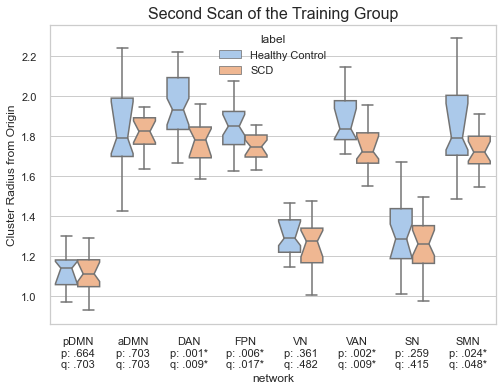

1 First Scan
First Scan of the Training Group title
(46, 164) CONDITIONAL DF
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2] SCAN LABELS
0     UMEC-002
2     UMEC-020
4     UMEC-022
6     UMEC-026
8     UMEC-028
10    UMEC-031
12    UMEC-038
14    UMEC-066
16    UMEC-073
18    UMEC-075
20    UMEC-079
22    UMEC-082
24    UMEC-083
26    UMEC-124
28    UMEC-125
30    UMEC-147
32    UMEC-160
34    UMEC-161
36    UMEC-186
38    UMEC-208
40    UMEC-225
42    UMEC-226
44    UMEC-004
46    UMEC-005
48    UMEC-017
50    UMEC-030
52    UMEC-032
54    UMEC-053
56    UMEC-115
58    UMEC-132
60    UMEC-146
62    UMEC-155
64    UMEC-157
66    UMEC-159
68    UMEC-162
70    UMEC-164
72    UMEC-168
74    UMEC-173
76    UMEC-174
78    UMEC-176
80    UMEC-192
82    UMEC-194
84    UMEC-201
86    UMEC-206
88    UMEC-217
90    UMEC-219
Name: ID, dtype: object ID LABELS
<generator object digest_stat_df.<locals>.<genexpr> at 0x000002B76F1A3BC8>
<generator object

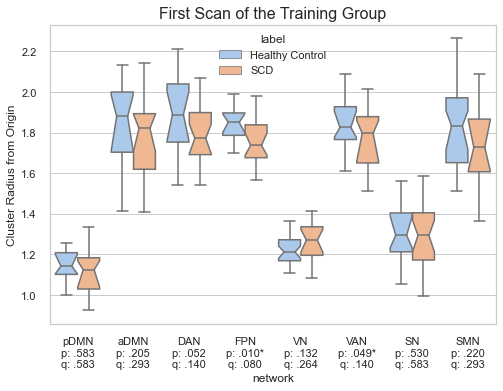

1 Both Scans (Mixed Model)
both scans!!
(180,) !!
Both Scans (Mixed Model) of the Training Group title
(92, 164) CONDITIONAL DF
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] SCAN LABELS
0     UMEC-002
1     UMEC-002
2     UMEC-020
3     UMEC-020
4     UMEC-022
        ...   
87    UMEC-206
88    UMEC-217
89    UMEC-217
90    UMEC-219
91    UMEC-219
Name: ID, Length: 92, dtype: object ID LABELS
<generator object digest_stat_df.<locals>.<genexpr> at 0x000002B76F1A3BC8>
<generator object digest_stat_df.<locals>.<genexpr> at 0x000002B76F1A3BC8>
<generator object digest_stat_df.<locals>.<genexpr> at 0x000002B76F1A3BC8>
['pDMN_Coh', 'aDMN_Coh', 'DAN_Coh', 'FPN_Coh', 'VN_Coh', 'VAN_Coh', 'SN_Coh', 'SMN_Coh'] WC LABELS
rad
diagnosis label col
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1

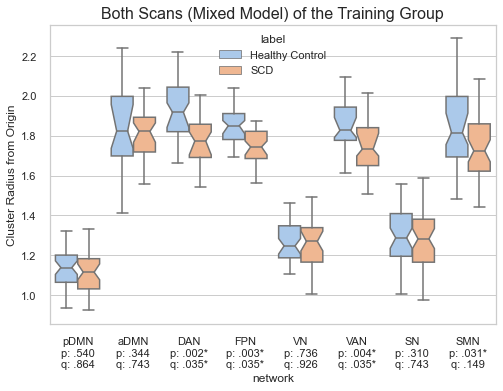

2 Second Scan
Second Scan of No Training Group title
(44, 164) CONDITIONAL DF
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2] SCAN LABELS
93     UMEC-008
95     UMEC-009
97     UMEC-076
99     UMEC-078
101    UMEC-080
103    UMEC-081
105    UMEC-127
107    UMEC-136
109    UMEC-138
111    UMEC-150
113    UMEC-181
115    UMEC-182
117    UMEC-184
119    UMEC-185
121    UMEC-190
123    UMEC-196
125    UMEC-197
127    UMEC-210
129    UMEC-227
131    UMEC-036
133    UMEC-039
135    UMEC-054
137    UMEC-060
139    UMEC-061
141    UMEC-064
143    UMEC-068
145    UMEC-100
147    UMEC-101
149    UMEC-104
151    UMEC-121
153    UMEC-139
155    UMEC-141
157    UMEC-145
159    UMEC-148
161    UMEC-151
163    UMEC-152
165    UMEC-154
167    UMEC-163
169    UMEC-172
171    UMEC-191
173    UMEC-205
175    UMEC-213
177    UMEC-214
179    UMEC-216
Name: ID, dtype: object ID LABELS
<generator object digest_stat_df.<locals>.<genexpr> at 0x000002B775EB7148>
<gener

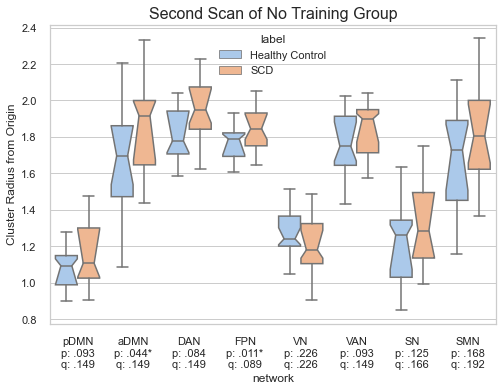

2 First Scan
First Scan of No Training Group title
(44, 164) CONDITIONAL DF
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2] SCAN LABELS
92     UMEC-008
94     UMEC-009
96     UMEC-076
98     UMEC-078
100    UMEC-080
102    UMEC-081
104    UMEC-127
106    UMEC-136
108    UMEC-138
110    UMEC-150
112    UMEC-181
114    UMEC-182
116    UMEC-184
118    UMEC-185
120    UMEC-190
122    UMEC-196
124    UMEC-197
126    UMEC-210
128    UMEC-227
130    UMEC-036
132    UMEC-039
134    UMEC-054
136    UMEC-060
138    UMEC-061
140    UMEC-064
142    UMEC-068
144    UMEC-100
146    UMEC-101
148    UMEC-104
150    UMEC-121
152    UMEC-139
154    UMEC-141
156    UMEC-145
158    UMEC-148
160    UMEC-151
162    UMEC-152
164    UMEC-154
166    UMEC-163
168    UMEC-172
170    UMEC-191
172    UMEC-205
174    UMEC-213
176    UMEC-214
178    UMEC-216
Name: ID, dtype: object ID LABELS
<generator object digest_stat_df.<locals>.<genexpr> at 0x000002B76F1A3BC8>
<generat

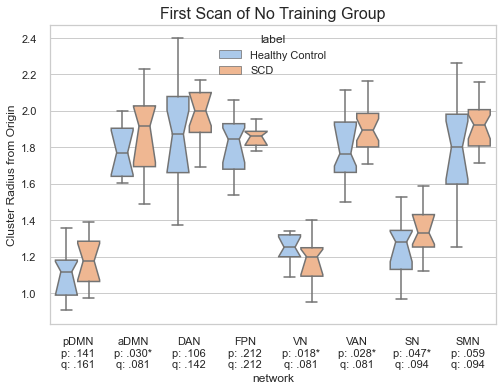

2 Both Scans (Mixed Model)
both scans!!
(180,) !!
Both Scans (Mixed Model) of No Training Group title
(88, 164) CONDITIONAL DF
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2] SCAN LABELS
92     UMEC-008
93     UMEC-008
94     UMEC-009
95     UMEC-009
96     UMEC-076
         ...   
175    UMEC-213
176    UMEC-214
177    UMEC-214
178    UMEC-216
179    UMEC-216
Name: ID, Length: 88, dtype: object ID LABELS
<generator object digest_stat_df.<locals>.<genexpr> at 0x000002B775EB7748>
<generator object digest_stat_df.<locals>.<genexpr> at 0x000002B775EB7748>
<generator object digest_stat_df.<locals>.<genexpr> at 0x000002B775EB7748>
['pDMN_Coh', 'aDMN_Coh', 'DAN_Coh', 'FPN_Coh', 'VN_Coh', 'VAN_Coh', 'SN_Coh', 'SMN_Coh'] WC LABELS
rad
diagnosis label col
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

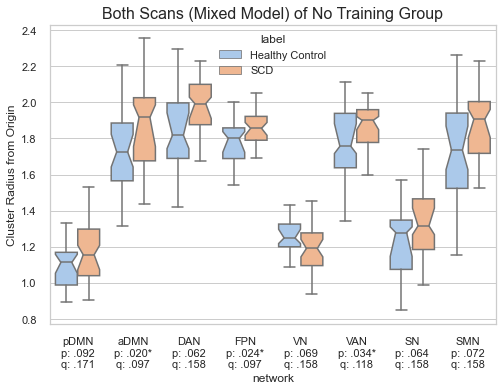

10 Second Scan
Second Scan of All patients title
(90, 164) CONDITIONAL DF
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] SCAN LABELS
1      UMEC-002
3      UMEC-020
5      UMEC-022
7      UMEC-026
9      UMEC-028
         ...   
171    UMEC-191
173    UMEC-205
175    UMEC-213
177    UMEC-214
179    UMEC-216
Name: ID, Length: 90, dtype: object ID LABELS
<generator object digest_stat_df.<locals>.<genexpr> at 0x000002B76F1A3BC8>
<generator object digest_stat_df.<locals>.<genexpr> at 0x000002B76F1A3BC8>
<generator object digest_stat_df.<locals>.<genexpr> at 0x000002B76F1A3BC8>
['pDMN_Coh', 'aDMN_Coh', 'DAN_Coh', 'FPN_Coh', 'VN_Coh', 'VAN_Coh', 'SN_Coh', 'SMN_Coh'] WC LABELS
rad
diagnosis label col
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1

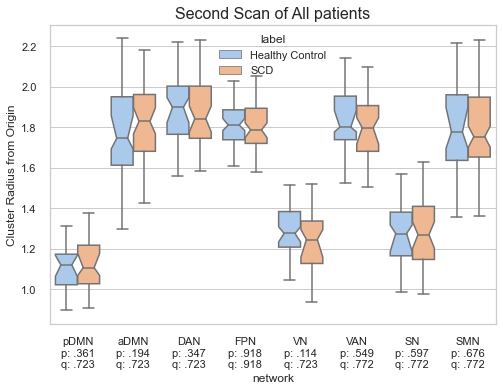

10 First Scan
First Scan of All patients title
(90, 164) CONDITIONAL DF
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] SCAN LABELS
0      UMEC-002
2      UMEC-020
4      UMEC-022
6      UMEC-026
8      UMEC-028
         ...   
170    UMEC-191
172    UMEC-205
174    UMEC-213
176    UMEC-214
178    UMEC-216
Name: ID, Length: 90, dtype: object ID LABELS
<generator object digest_stat_df.<locals>.<genexpr> at 0x000002B775EB7148>
<generator object digest_stat_df.<locals>.<genexpr> at 0x000002B775EB7148>
<generator object digest_stat_df.<locals>.<genexpr> at 0x000002B775EB7148>
['pDMN_Coh', 'aDMN_Coh', 'DAN_Coh', 'FPN_Coh', 'VN_Coh', 'VAN_Coh', 'SN_Coh', 'SMN_Coh'] WC LABELS
rad
diagnosis label col
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1

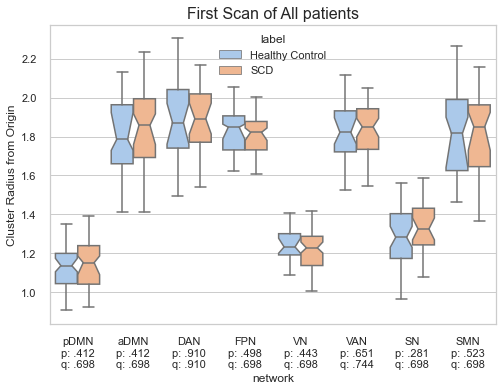

10 Both Scans (Mixed Model)
Both Scans (Mixed Model) of All patients title
(180, 164) CONDITIONAL DF
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] SCAN LABELS
0      UMEC-002
1      UMEC-002
2      UMEC-020
3      UMEC-020
4      UMEC-022
         ...   
175    UMEC-213
176    UMEC-214
177    UMEC-214
178    UMEC-216
179    UMEC-216
Name: ID, Length: 180, dtype: object ID LABELS
<generator object digest_stat_df.<locals>.<genexpr> at 0x000002B775EB7848>
<generator object digest_stat_df.<locals>.<genexpr> at 0x000002B775EB7848>
<generator object digest_stat_df.<locals>.<genexpr> at 0x000002B775EB7848>
['pDMN_Coh', 'aDMN_Coh', 'DAN_Coh', 'FPN_Coh', 'VN_Coh', 'VAN_Coh', 'SN_C

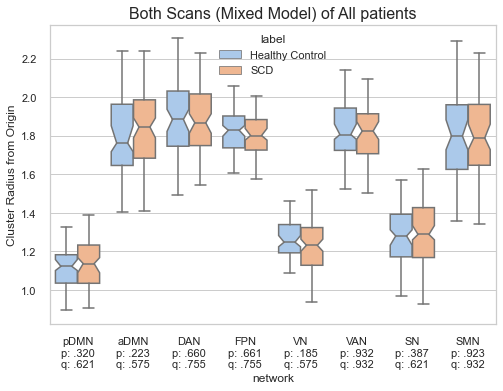

In [17]:
run_all_slices_diagnosis(full_stat_df,title_dict,output_dir)

In [1]:
run_all_slices_training(full_stat_df,title_dict,output_dir)

NameError: name 'run_all_slices_training' is not defined